# **Khám phá và phân tích dữ liệu (EDA)**

## **Giới thiệu:**

Phân tích và khám phá dữ liệu của Iris Dataset
những đặc tính được sử dụng:

    Number of times pregnant

    Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    Diastolic blood pressure (mm Hg)

    Triceps skin fold thickness (mm)

    2-Hour serum insulin (mu U/ml)

    Body mass index (weight in kg/(height in m)^2)

    Diabetes pedigree function

    Age (years)

    Class variable (0 or 1)

mục đích là chẩn đoán xem người đó có bị tiểu đường hay không.

Những thư viện dùng cho việc triển khai dữ liệu:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Load dữ liệu**

In [3]:
columms_names = ['Pegnancies',
                 'Glucose',
                 'BloodPressure',
                 'SkinThickness',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunc',
                 'Age',
                 'Outcome']
df = pd.read_csv("../data/pima-indians-diabetes.csv",names=columms_names)

In [4]:
df

,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pegnancies            768 non-null    int64  
 1   Glucose               768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   SkinThickness         768 non-null    int64  
 4   Insulin               768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   DiabetesPedigreeFunc  768 non-null    float64
 7   Age                   768 non-null    int64  
 8   Outcome               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Kiểm tra dữ liệu thiếu

In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\nSố lượng giá trị 0 trong các cột chính:")
for col in cols_with_zero:
    print(f"{col}: {df[df[col] == 0].shape[0]}")

# Thay thế giá trị 0 bằng NaN để xử lý sau này
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("\nSố lượng giá trị thiếu sau khi thay thế 0 bằng NaN:")
print(df.isnull().sum())


Số lượng giá trị 0 trong các cột chính:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

Số lượng giá trị thiếu sau khi thay thế 0 bằng NaN:
Pegnancies                0
Glucose                   5
BloodPressure            35
SkinThickness           227
Insulin                 374
BMI                      11
DiabetesPedigreeFunc      0
Age                       0
Outcome                   0
dtype: int64


In [9]:
df.describe()

,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Số người bị tiểu đường ít hơn so với người bị tiểu đường, cần qua bước xử lý trước khi đưa vào huấn luyện mô hình.

## **Độ tương quan**

In [10]:
df.corr()

,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
Pegnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunc,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


## **Biểu diễn EDA bằng đồ thị**

### **Chênh lệch về số lượng Outcome**

<Axes: xlabel='Outcome'>

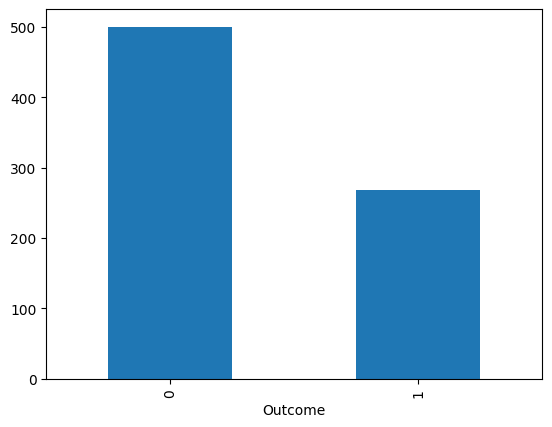

In [11]:
df['Outcome'].value_counts().plot.bar()

### Điều được kết luận:


- Outcome giữa người bị tiểu đường và không tiêu đường không cân bằng
- không an toàn để sử dụng nhiều phương pháp phân loại khác
- Yêu cầu các bước tiền xử lý dữ liệu các dữ liệu bị lệch (Augmentation, oversampling, downsampling)
- ....

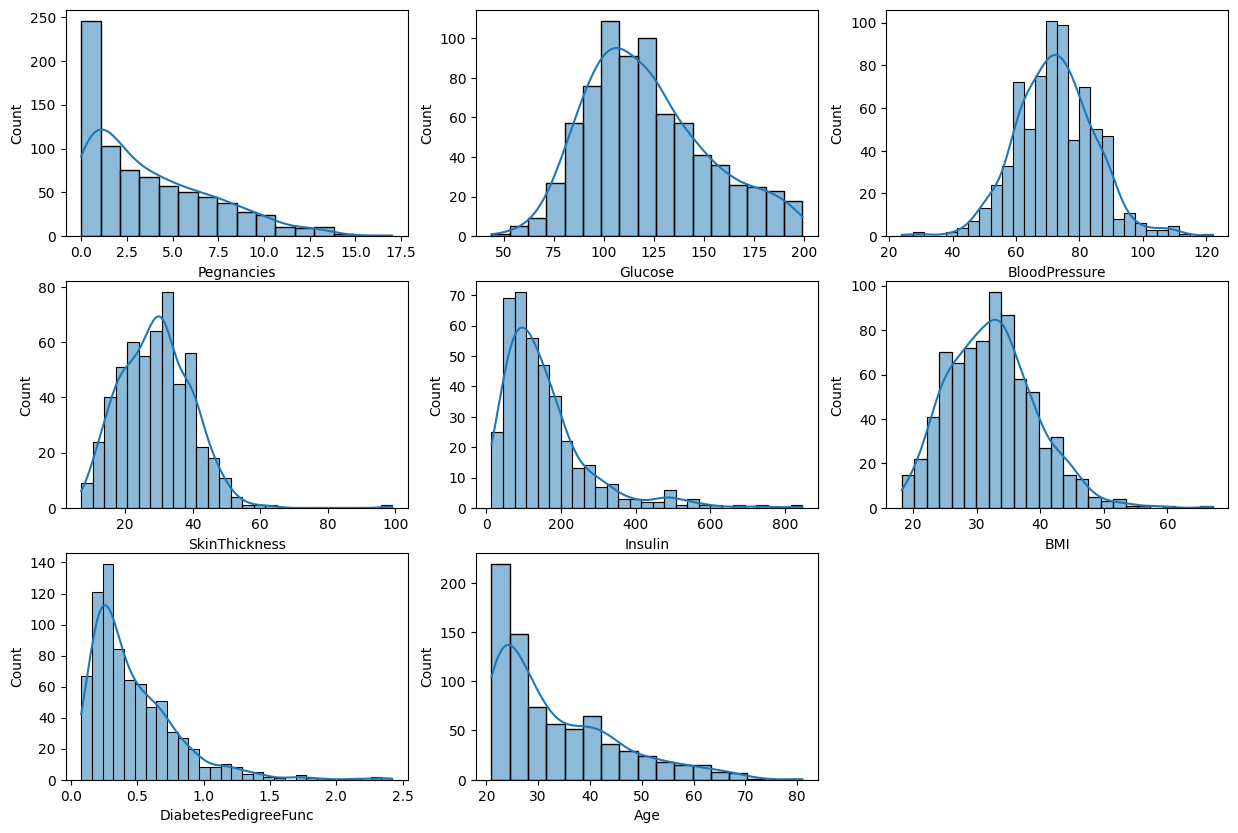

In [37]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col],kde=True)
plt.show()